In [1]:
!pip install seaborn
!pip install plotly
!pip install folium
!pip install --upgrade nbformat



In [2]:

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium


In [3]:

# Task 1: Loading the Data
df = pd.read_csv(r"C:\Users\bhupender kumar\Downloads\housing_data.csv")


In [4]:

df.head()

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,SC60,RL,65,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,Feb,2008,WD,Normal,208500
1,1,SC20,RL,80,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,May,2007,WD,Normal,181500
2,2,SC60,RL,68,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Sep,2008,WD,Normal,223500
3,3,SC70,RL,60,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Feb,2006,WD,Abnorml,140000
4,4,SC60,RL,84,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Dec,2008,WD,Normal,250000


In [5]:
# Task 2: Cleaning the Data
def fill_missing_values(df):
    # Handling missing values by filling null values
    # Filling missing values in numerical columns with the mean
    num_cols = df.select_dtypes(include='number').columns
    df[num_cols] = df[num_cols].fillna(df[num_cols].mean())
    
    # Filling missing values in object columns with the mode
    obj_cols = df.select_dtypes(include='object').columns
    df[obj_cols] = df[obj_cols].fillna(df[obj_cols].mode().iloc[0])

    return df

df1 = fill_missing_values(df)


In [6]:
df1.head()

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,SC60,RL,65,8450,Pave,Grvl,Reg,Lvl,AllPub,...,0,No,No,No,0,Feb,2008,WD,Normal,208500
1,1,SC20,RL,80,9600,Pave,Grvl,Reg,Lvl,AllPub,...,0,No,No,No,0,May,2007,WD,Normal,181500
2,2,SC60,RL,68,11250,Pave,Grvl,IR1,Lvl,AllPub,...,0,No,No,No,0,Sep,2008,WD,Normal,223500
3,3,SC70,RL,60,9550,Pave,Grvl,IR1,Lvl,AllPub,...,0,No,No,No,0,Feb,2006,WD,Abnorml,140000
4,4,SC60,RL,84,14260,Pave,Grvl,IR1,Lvl,AllPub,...,0,No,No,No,0,Dec,2008,WD,Normal,250000


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   int64  
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

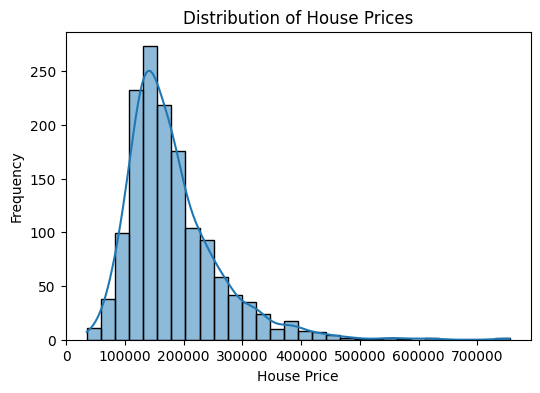

In [10]:
# Task 3: Univariate Analysis
# Histogram for house prices
plt.figure(figsize=(6, 4))
sns.histplot(df['SalePrice'], bins=30, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('House Price')
plt.ylabel('Frequency')
plt.show()


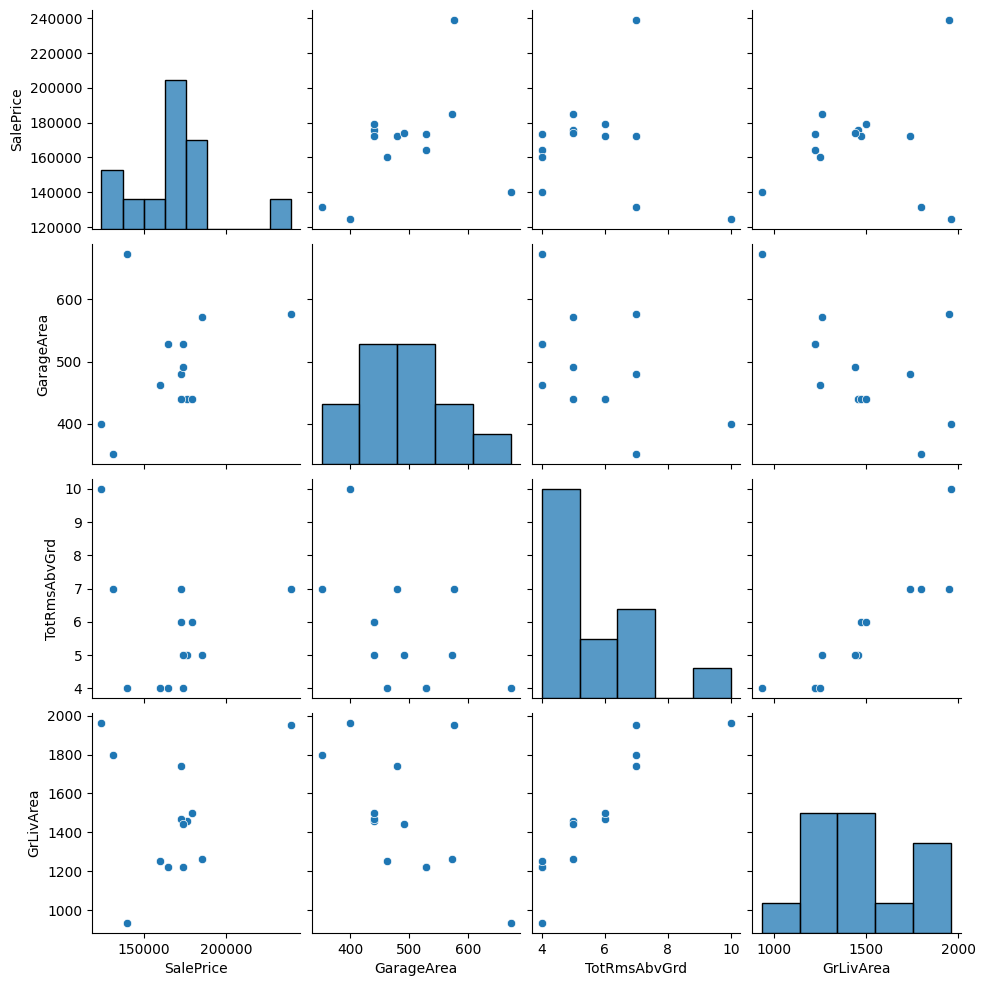

In [11]:

# Task 4: Multivariate Analysis
# Scatterplot matrix for selected features
sns.pairplot(df[['SalePrice', 'GarageArea', 'TotRmsAbvGrd', 'GrLivArea']])
plt.show()



In [16]:
# Task 5: Feature Engineering
# Create a new feature 'price_per_sqft'
df['price_per_sqft'] = df['SalePrice'] / df['GrLivArea']
print(df['price_per_sqft'])


56       99.194940
87      134.395425
115     120.713306
281     146.592710
297     122.564103
505      63.520408
579      73.259053
755     117.267165
758     119.520320
914     141.938725
1091    127.795527
1129    149.572650
1191    120.749480
Name: price_per_sqft, dtype: float64


In [23]:
# Task 6: Geospatial Analysis
# Visualize house prices on a map
fig = px.scatter_mapbox(df, lat='LotFrontage', lon='LotArea', color='SalePrice',
                        size='GrLivArea', hover_name='MSSubClass',
                        mapbox_style='carto-positron', title='House Prices Distribution on Map')
fig.show()

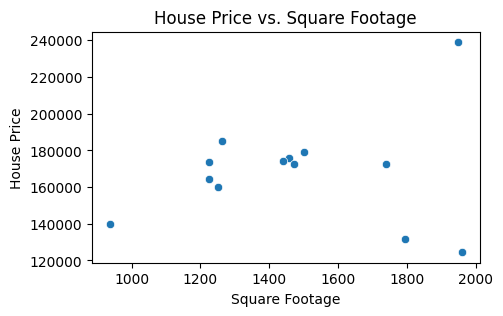

In [35]:
# Task 7: Feature Engineering and Size Impact
# Scatterplot for house prices vs. square footage
plt.figure(figsize=(5, 3))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df)
plt.title('House Price vs. Square Footage')
plt.xlabel('Square Footage')
plt.ylabel('House Price')
plt.show()



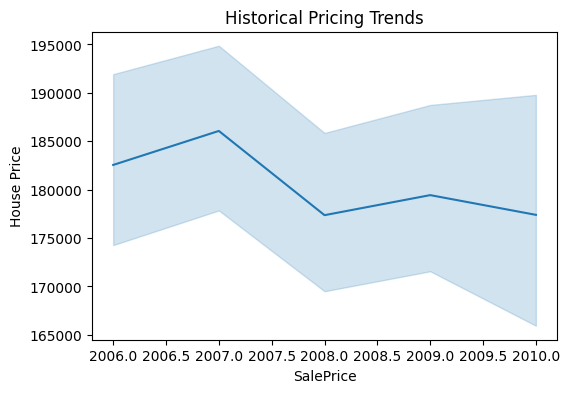

In [11]:
# Task 8: Market Trends and Historical Pricing
# Line plot for historical pricing trends
plt.figure(figsize=(6, 4))
sns.lineplot(x='YrSold', y='SalePrice', data=df)
plt.title('Historical Pricing Trends')
plt.xlabel('SalePrice')
plt.ylabel('House Price')
plt.show()




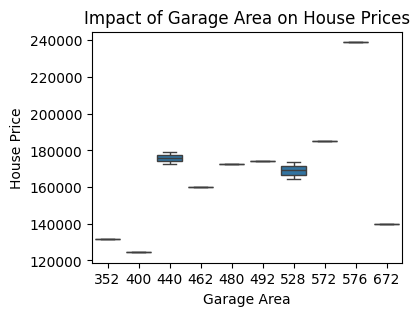

In [40]:
# Task 9: Customer Preferences and Amenities
# Boxplot for house prices with/without a GarageArea
plt.figure(figsize=(4, 3))
sns.boxplot(x='GarageArea', y='SalePrice', data=df)
plt.title('Impact of Garage Area on House Prices')
plt.xlabel('Garage Area')
plt.ylabel('House Price')
plt.show()